## 🎬 Dataset: IMDb Movies Dataset

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
plt.rcParams['figure.figsize']=(10,6)


#### load Dataset



In [7]:
df=pd.read_csv('imdb_top_1000.csv')
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


#### cleaning

In [14]:
df.info()
df.describe()
df.isnull().sum()

# Clean missing data
df.dropna(subset=['IMDB_Rating'], inplace=True)

# Convert runtime
df['Runtime'] = (
    df['Runtime']
    .astype(str)                      
    .str.replace(' min', '', regex=False)
    .replace('nan', np.nan)           
    .astype(float)
)

# Simplify genre
df['Genre'] = df['Genre'].apply(lambda x: x.split(',')[0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   float64
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(3), int64(1), object(12)
memory usage: 125.1+ KB


In [13]:
# Convert 'Runtime' column safely to float
df['Runtime'] = (
    df['Runtime']
    .astype(str)                      # convert all to string (handles NaN or numbers)
    .str.replace(' min', '', regex=False)
    .replace('nan', np.nan)           # replace the string 'nan' back with np.nan
    .astype(float)
)
df['Runtime'].head(10)
df['Runtime'].dtype



dtype('float64')

## Insight:
Clean data ensures smooth analysis. Converting runtime to numeric helps in runtime-based analysis.

#### 🔢 NumPy Operations

In [15]:
ratings=np.array(df['IMDB_Rating'])

print("Mean RAting:",np.mean(ratings))
print("Median Rating:", np.median(ratings))
print("Std Deviation:", np.std(ratings))
print("Max Rating:", np.max(ratings))
print("Min Rating:", np.min(ratings))

high_rated=df[np.array(df['IMDB_Rating']>8.5)]
high_rated.head()

Mean RAting: 7.949299999999999
Median Rating: 7.9
Std Deviation: 0.2753534274346336
Max Rating: 9.3
Min Rating: 7.6


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142.0,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175.0,Crime,9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152.0,Action,9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202.0,Crime,9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96.0,Crime,9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


### Insight
Top movies have ratings above 9, span decades, and feature iconic directors and stars. Drama and Crime dominate genres, with strong audience votes and varying box office success.

### 📊 Pandas Exploration

In [17]:
print("Unique Genres:",df['Genre'].nunique())
print("Unique Directors:",df['Director'].nunique())

df['Director'].value_counts().head(10)

genre_avg=df.groupby('Genre')['IMDB_Rating'].mean().sort_values(ascending=False)
genre_avg.head(10)

Unique Genres: 14
Unique Directors: 548


Genre
Western      8.350000
Crime        8.016822
Fantasy      8.000000
Mystery      7.975000
Film-Noir    7.966667
Drama        7.957439
Action       7.949419
Biography    7.938636
Adventure    7.937500
Animation    7.930488
Name: IMDB_Rating, dtype: float64

#### Genre Ratings Insight
Western tops with 8.35, followed closely by Crime and Fantasy. Drama and Action also score near 8, showing consistent audience appreciation across these popular genres.


### 🎨 Data Visualization with Matplotlib
1️⃣ Histogram – IMDb Ratings


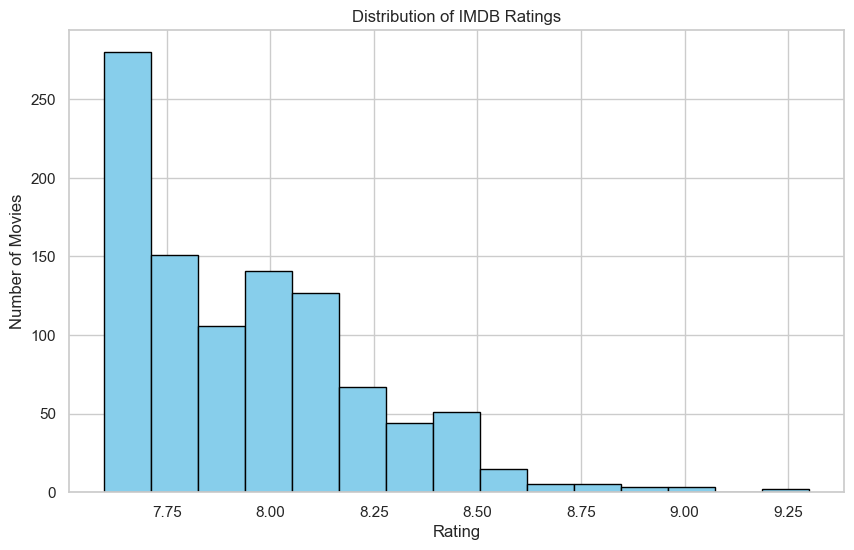

In [18]:
plt.hist(df['IMDB_Rating'],bins=15,color='skyblue',edgecolor='black')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Movies')
plt.show()

#### Insight
Most movies have ratings clustered around 7.7–8.0, with very few achieving ratings above 8.5—showing that exceptionally high ratings are rare in the IMDB Top 1000.

2️⃣ Scatter Plot – Runtime vs Rating

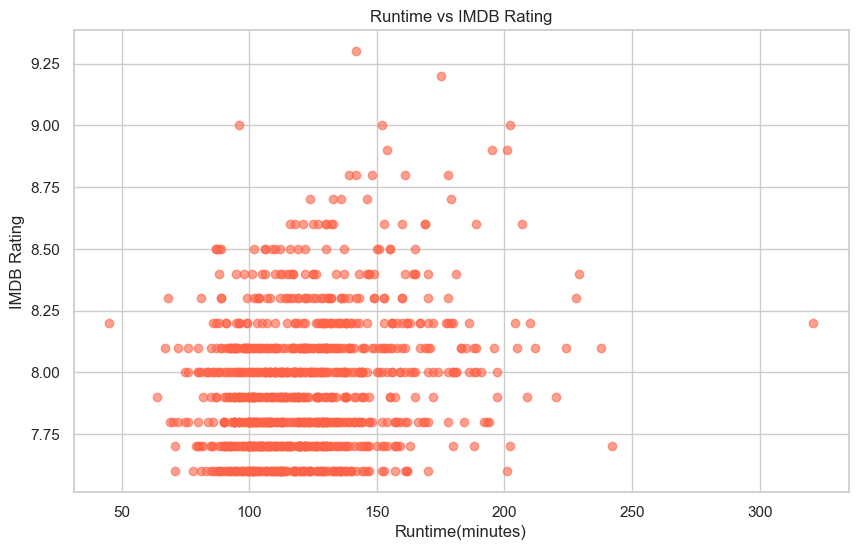

In [19]:
plt.scatter(df['Runtime'],df['IMDB_Rating'],alpha=0.6,color='tomato')
plt.title('Runtime vs IMDB Rating')
plt.xlabel('Runtime(minutes)')
plt.ylabel('IMDB Rating')
plt.show()

#### insight
Higher-rated movies often have runtimes between 100–200 minutes, suggesting longer films tend to be rated more favorably by IMDB audiences.

#### 💠 Seaborn Visualizations
3️⃣ Top Genres by Rating

C:\Users\Hello\AppData\Local\Temp\ipykernel_7252\3667833498.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_avg.values[:10],y=genre_avg.index[:10],palette='viridis')


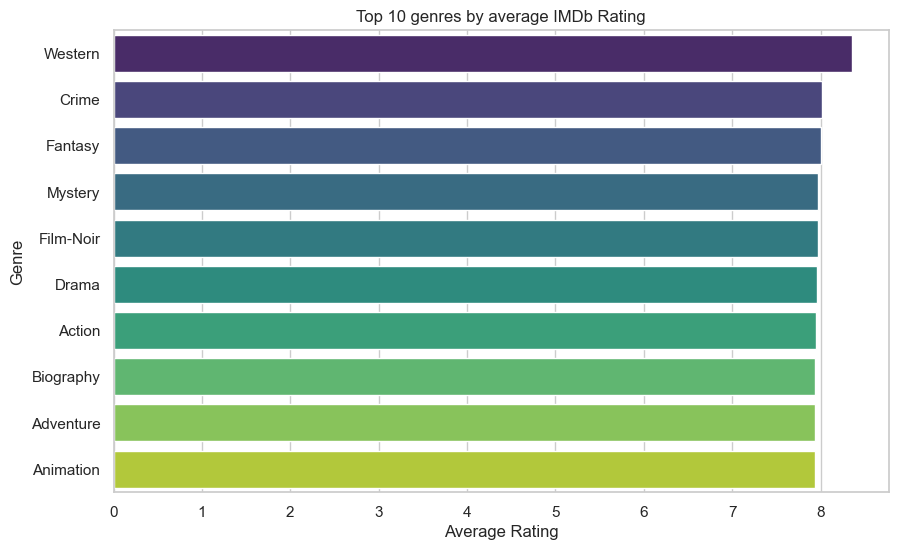

In [20]:
sns.barplot(x=genre_avg.values[:10],y=genre_avg.index[:10],palette='viridis')
plt.title('Top 10 genres by average IMDb Rating')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

#### insight
Westerns hold the highest average rating, closely followed by Crime and Fantasy—indicating these genres are most consistently liked in IMDB’s top 1000.

#### 4️⃣ Correlation Heatmap


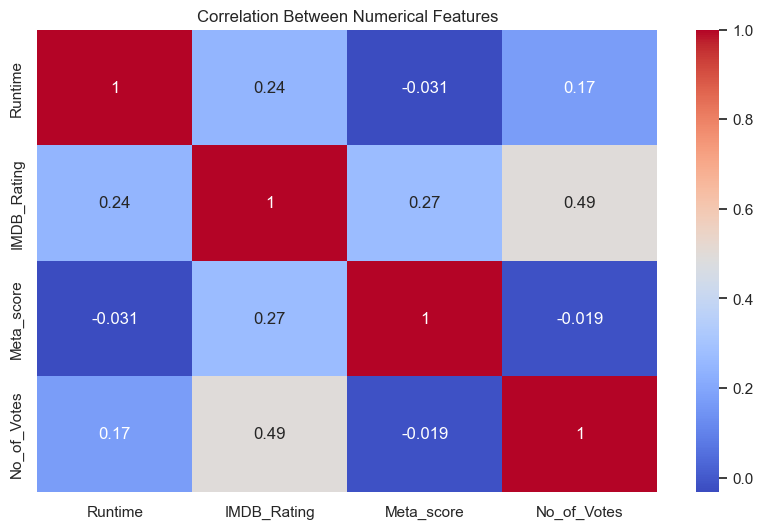

In [23]:
# Correlation Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Between Numerical Features')
plt.show()


#### insight
IMDB rating is moderately correlated with both the number of votes and Meta score, while runtime and other features show only weak relationships.

5️⃣ Pairplot


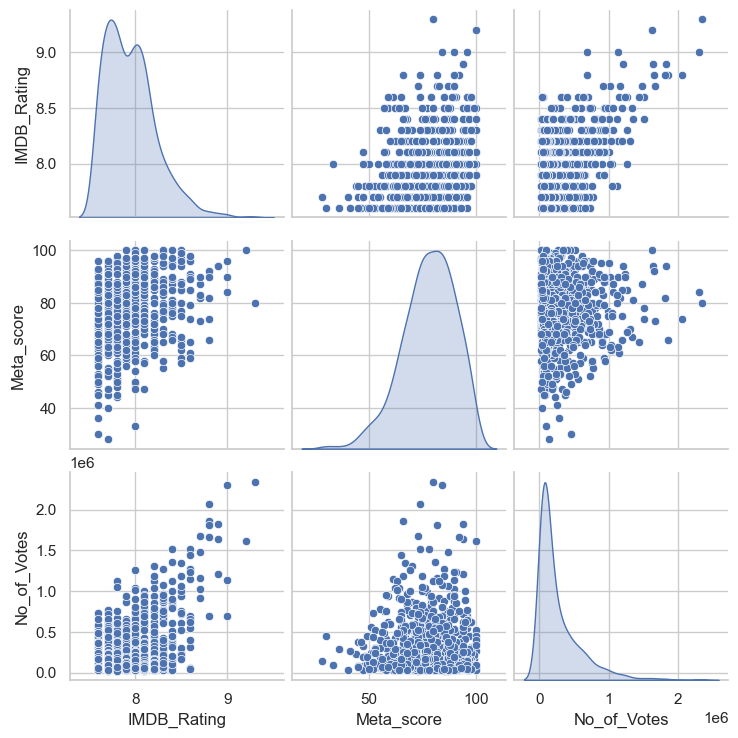

In [24]:
sns.pairplot(df[['IMDB_Rating','Meta_score','No_of_Votes']], diag_kind='kde')
plt.show()
